# 1. Regression

## 1.1. Load Data and Train Model

# SHAP Metrics

In [1]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

0.01902558611293644

# Create a Custom Feature Importance Calculator

In [2]:
from holisticai.explainability.commons import SHAPImportanceCalculator

/home/kcosta/.local/share/hatch/env/virtual/holisticai/6RE4VnP4/holisticai/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:404: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


In [3]:
from holisticai.explainability.metrics import regression_explainability_features
from holisticai.explainability.metrics import compute_explainability_metrics_from_features

feature_importance_fn = SHAPImportanceCalculator(train['X'], model)

xai_features = regression_explainability_features(test['X'], test['y'], model.predict, strategy=feature_importance_fn)

compute_explainability_metrics_from_features(xai_features, metric_type='both')

,value,reference
metric,,
Alpha Importance Score,0.376238,0.0
XAI Ease Score,1.000000,1.0
Position Parity,0.027573,1.0
Rank Alignment,0.147620,1.0
Spread Ratio,0.877283,0.0
Spread Divergence,0.556000,0.0
Feature Stability,0.964367,0.0
Data Stability,2.353798,0.0


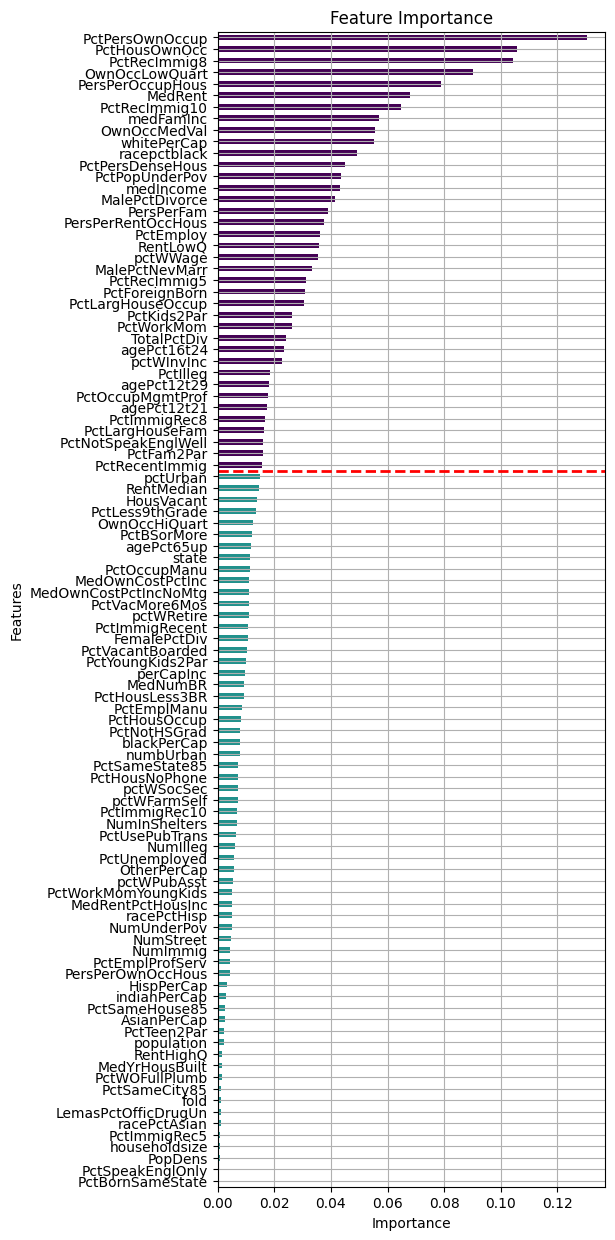

In [4]:
from holisticai.explainability.plots import plot_feature_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1, figsize=(5,15))
plot_feature_importance(xai_features.feature_importance, xai_features.ranked_feature_importance, top_n=100, ax=ax)

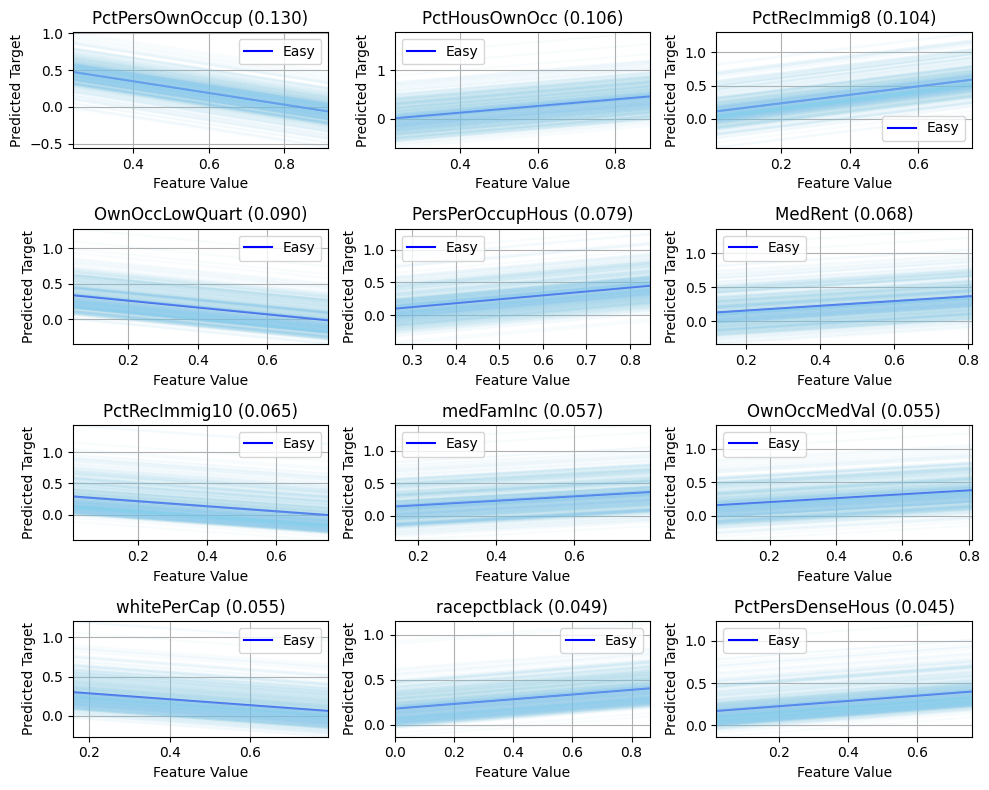

In [5]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(xai_features.partial_dependence, xai_features.ranked_feature_importance, subplots=(4,3), figsize=(10, 8))

# 3. Classification

In [6]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test'].sample(200)

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.805

In [7]:
from holisticai.explainability.metrics import classification_explainability_features
from holisticai.explainability.metrics import compute_explainability_metrics_from_features

feature_importance_fn = SHAPImportanceCalculator(train['X'], model)

xai_features = classification_explainability_features(test['X'], test['y'], model.predict, model.predict_proba, classes=model.classes_, strategy=feature_importance_fn)

compute_explainability_metrics_from_features(xai_features, metric_type='both')

PermutationExplainer explainer: 153it [00:19,  5.32it/s]                         


,value,reference
metric,,
Alpha Importance Score,0.024390,0.0
XAI Ease Score,1.000000,1.0
Position Parity,0.000000,1.0
Rank Alignment,0.000000,1.0
Spread Ratio,0.299356,0.0
Spread Divergence,0.096023,0.0
Feature Stability,NaN,0.0
Data Stability,NaN,0.0


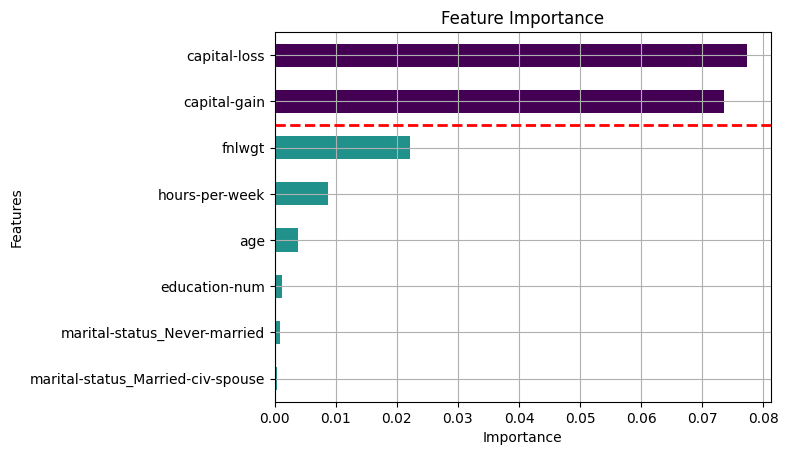

In [8]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(xai_features.feature_importance, xai_features.ranked_feature_importance, top_n=8)

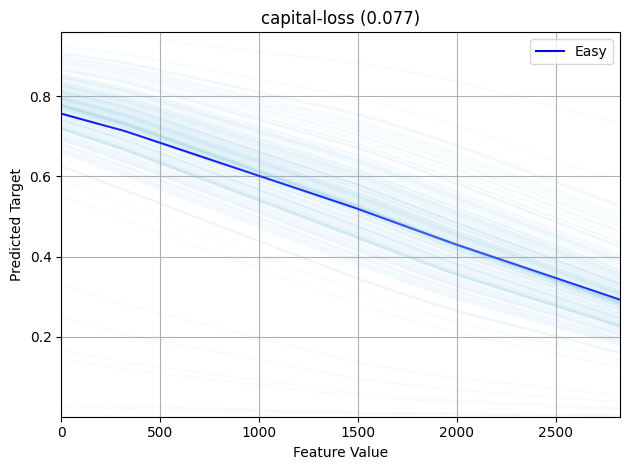

In [9]:
from holisticai.explainability.plots import plot_partial_dependence

class_index = 0 #1
plot_partial_dependence(xai_features.partial_dependence[class_index], xai_features.ranked_feature_importance, subplots=(1,1))

# Multi Classification

In [10]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.5063291139240507

In [11]:
from holisticai.explainability.metrics import multiclass_explainability_features
from holisticai.explainability.metrics import compute_explainability_metrics_from_features

feature_importance_fn = SHAPImportanceCalculator(train['X'], model)

xai_features = multiclass_explainability_features(test['X'], test['y'], model.predict, model.predict_proba, classes=model.classes_, strategy=feature_importance_fn)

compute_explainability_metrics_from_features(xai_features)

,value,reference
metric,,
Alpha Importance Score,0.461538,0.0
XAI Ease Score,1.000000,1.0
Position Parity,0.084990,1.0
Rank Alignment,0.199946,1.0
Spread Ratio,0.908043,0.0
Spread Divergence,0.667412,0.0


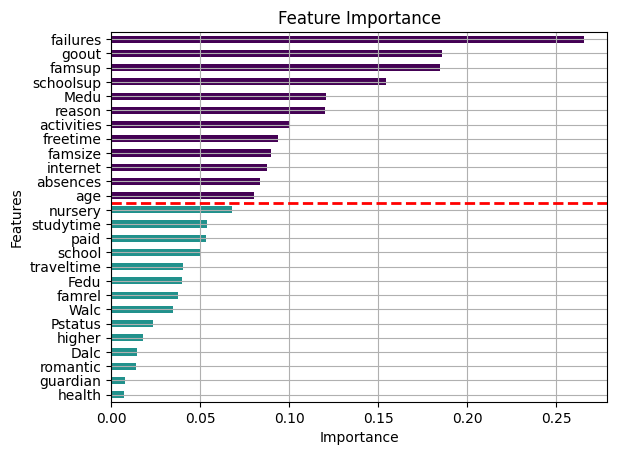

In [12]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(xai_features.feature_importance, xai_features.ranked_feature_importance, top_n=30)

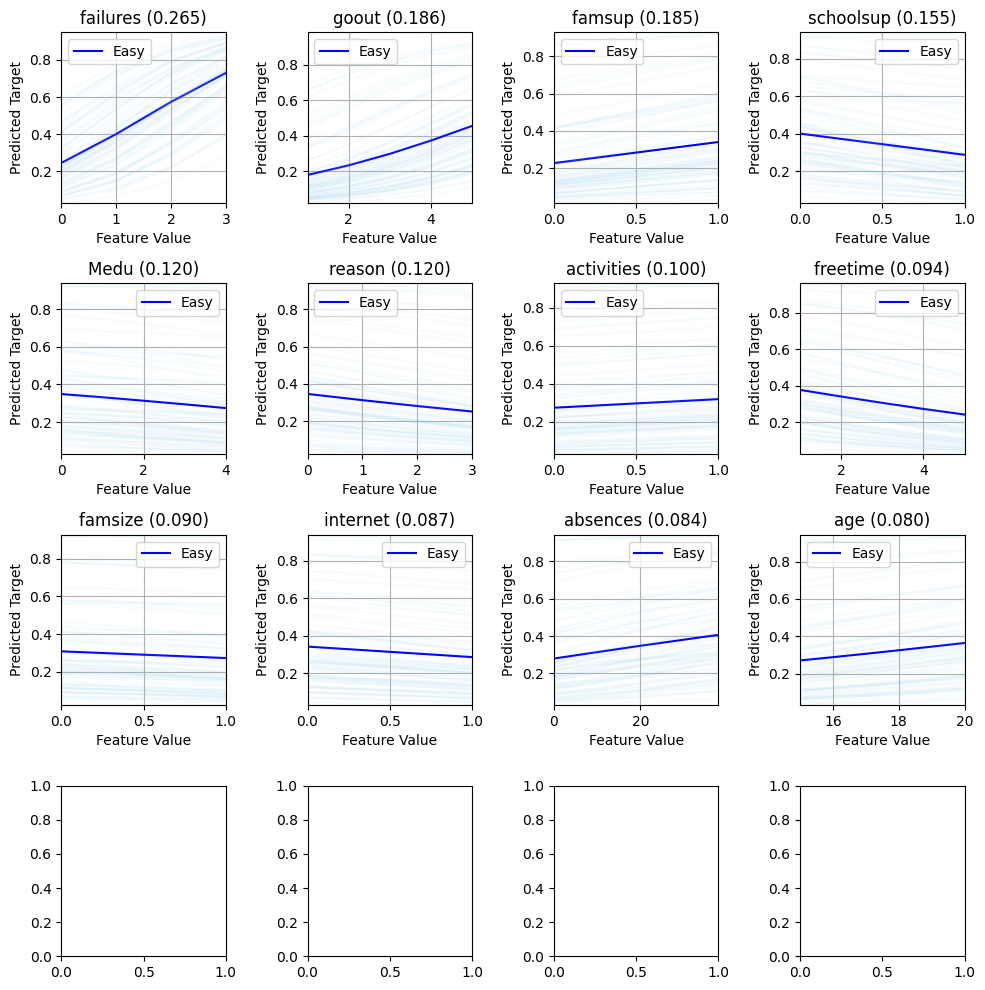

In [13]:
from holisticai.explainability.plots import plot_partial_dependence

class_index = 0 #1
plot_partial_dependence(xai_features.partial_dependence[0], xai_features.ranked_feature_importance, subplots=(4,4), figsize=(10,10))